# MSc in AI - CE6002 & CS5062


# E-tivity 4: Overfitting & How to Prevent It
# CS5062 - Performance of Classifiers - Tasks 1, 2 and 3

## Student Name: Mark Murnane
## Student ID: 18195326
-----

### Imports and Additional Functions

The following imports are taken from the provided examples.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import cycle

from sklearn import preprocessing
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from scipy import interp

Load Nik's provided functions for evaluation and plotting.

In [2]:
%run ./Lab4_Functions.ipynb

Also want to suppress any FutureWarnings generated by scikit-learn.

In [3]:
# Don't want FutureWarnings from scikit-learn while running Cross-Validation
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Task 1

This task repeats the training and evaluation of SVM and Naive Bayes classifiers found in *Lab 4 - Comparison of Classifiers - Main* but this time on the *loans_et4.csv* dataset.

Additionally, a third classification algorithm from scikit-learn should be trained and evaluated.  Any algorithm other than SVM or Naive Bayes can be used.

Finally a summary of the conclusions will be provided.

-----

## Data Load

In [4]:
df = pd.read_csv("./loans_et4.csv")
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,2378,0.0,46,360,1,0,0
1,0,0,0,1,0,5000,2541.0,151,480,1,0,0
2,0,0,0,1,0,10000,1666.0,225,360,1,0,0
3,1,0,0,1,0,6500,0.0,105,360,0,0,0
4,1,0,0,1,0,1853,2840.0,114,360,1,0,0


The data set consists of all numeric attributes.  There are no missing values.

The target attribute is *Loan_Status*.  As per Nik's comment in the Q&A Session on March 11th, no specific EDA is required for this E-tivity.

As it's important to understand the target attribute distribution for Cross-Validation and also choosing ROC vs. Precision-Recall Curve's, we'll determine the unique counts of *Loan_Status*.

In [6]:
df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [7]:
print(f"The first occurence of Loan_Status = 1 occurs at row {df['Loan_Status'].idxmin()}")

The first occurence of Loan_Status = 1 occurs at row 0


The counts show that dataset is split 30.83%/69.16% for *Loan_Status* = 0/1.  

The data in the file is also sorted by *Loan_Status* so need to be sure to shuffle the data set.

-----

To keep things simple later and following Nik's lead split, the data frame into *predictor* attributes and the *target* attribute.  These will be stored as numpy arrays.

In [8]:
# Extract that target attribute first
target = df['Loan_Status'].values

# Extract the predictors
predictors = df.drop('Loan_Status', axis=1).values

# Scale the Predictors to range [0, 1]
# Target value is already in range [0 1]
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

## Classification Training

### Create scale for graphs

To ensure graphs are uniform create a consistent (and full) range of False-Positive Rate (fpr) values between 0 and 1.

In [9]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

### Train SVM

Train the SVM Classifier in Probabilistic mode.

In [10]:
SVM_classifier = svm.SVC(probability=True)

# Train and evaluate the classifier by applying 5-fold cross validation.
accuracies_SVM, f1_scores_SVM, tprs_SVM, aucs_SVM = evaluate_classifier(folds=5, 
                                                                        p=predictors, t=target, 
                                                                        classifier=SVM_classifier, 
                                                                        mean_fpr=mean_fpr)

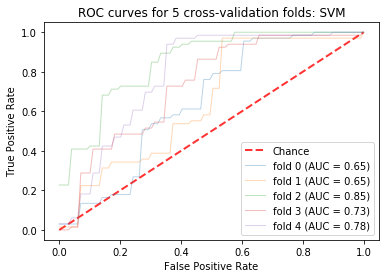

In [11]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

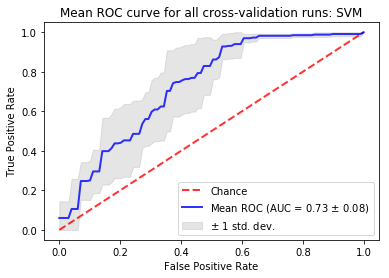

In [12]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

### Train Naive Bayes

Train the Naive Bayes (`GaussianNB`) Classifier.  Does not need to be configured for probabilistic classification.

In [13]:
NB_classifier = GaussianNB()

accuracies_NB, f1_scores_NB, tprs_NB, aucs_NB = evaluate_classifier(folds=5, 
                                                                    p=predictors, t=target, 
                                                                    classifier=NB_classifier, 
                                                                    mean_fpr=mean_fpr)

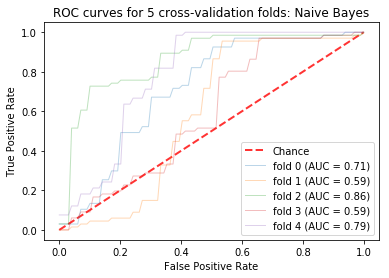

In [14]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

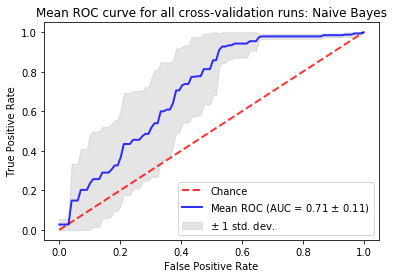

In [15]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

### Train a 3rd scikit-learn Classifier

For this part of Task 1 I've decided to implement the `LogisticRegression` from scikit-learn.  

In [16]:
LR_classifier  = LogisticRegression()

accuracies_LR, f1_scores_LR, tprs_LR, aucs_LR = evaluate_classifier(folds=5, 
                                                                    p=predictors, t=target, 
                                                                    classifier=LR_classifier, 
                                                                    mean_fpr=mean_fpr)

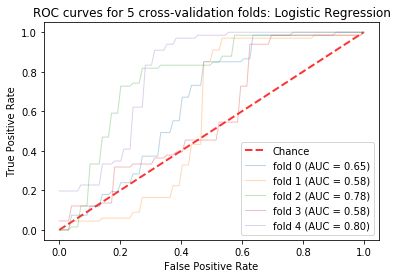

In [29]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_LR, aucs_LR, 'Logistic Regression')

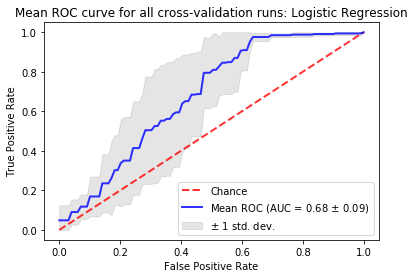

In [30]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_LR, aucs_LR, 'Logistic Regression')

### Compare SVM, Naive Bayes and 3rd Classifier (Logistic Regression)

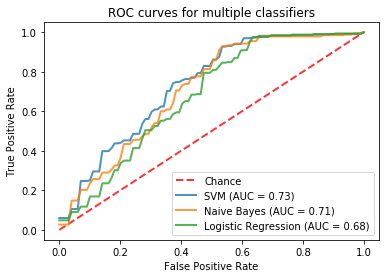

In [37]:
plot_roc_multiple_classifiers(mean_fpr, 
                              np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_NB, axis=0), np.mean(tprs_LR, axis=0))), 
                              np.array([np.mean(aucs_SVM), np.mean(aucs_NB), np.mean(aucs_LR)]), 
                              np.array(['SVM', 'Naive Bayes', 'Logistic Regression']))

In [38]:
# Compare the statistics of the accuracies across all cross-validation folds
accuracies_df = pd.DataFrame(data={'SVM' : accuracies_SVM, 'Naive Bayes' : accuracies_NB, 'Logistic Regression' : accuracies_LR})
accuracies_df.describe()

,SVM,Naive Bayes,Logistic Regression
count,5.000000,5.000000,5.000000
mean,0.808403,0.791670,0.808403
std,0.029567,0.053465,0.029567
min,0.778947,0.715789,0.778947
25%,0.783505,0.762887,0.783505
50%,0.812500,0.804124,0.812500
75%,0.814433,0.822917,0.814433
max,0.852632,0.852632,0.852632


### Conclusion

Interestingly both `SVM` and `LogisticRegression` have identical values in their `accuracy` arrays and this requires further investigation.

The ROC plot shows that the SVM has overall a better ratio of false-positive-rate to true-positive-rate.  SVM outperforms the other algorithms in terms of Sensitivity (TPR) sooner than the other algorithms, i.e. with a lower FPR.  This suggests that SVM is the better algorithm to take forward for optimisation.